# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Get OpenWeatherMap API Key

api_key = weather_api_key

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# print(query_url)

# Create lists to hold various weather data
city_name = []
temps = []
lats = []
humid = []
cloudy = []
wind = []
country = []

# Create counter for city number
city_num = 1

# Print statement for beginning of loop/log
print(f'Starting Loop of Cities')
print(f'-----------------------------------')

# Create loop to go through cities in the city list (cities)
for city in cities:
    
    # Using try in event data in CityPy not available in OpenWeatherMap
    try:
        response = requests.get(f'{query_url}&q={city}').json()
        
        # Append weather data to empty lists
        city_name.append(response['name'])
        temps.append(response['main']['temp_max'])
        lats.append(response['coord']['lat'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])

        print(f'Processing {city_num}, {city}:')
        print(f'{query_url}&q={city}')

        # Add 1 to the city number as the loop progresses
        city_num = city_num + 1

        # Use timesleep (1 second pause) to not exceed API rate limit
        # Time sleep reference https://www.pythoncentral.io/pythons-time-sleep-pause-wait-sleep-stop-your-code/
        time.sleep(1)
    
    # If the city is not found
    except:
        print('City not available.')
    continue

/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=markova
Processing 411, teguldet:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=teguldet
Processing 412, christchurch:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=christchurch
Processing 413, puerto madryn:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=puerto madryn
Processing 414, indramayu:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=indramayu
Processing 415, guangyuan:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=guangyuan
Processing 416, montepuez:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=montepuez
Processing 417, shache:
http://api.openweathermap.org/data/2.5/wea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Put lists of weather data into dictionary for converting to Data Frame
weather_dict = {
    "City": city_name,
    "Country": country,
    "High Temp (F)": temps,
    "Cloudiness (%)": cloudy,
    "Humidity (%)": humid,
    "Wind (mph)": wind,
    "Latitude": lats
}

# Create DataFrame from dictionary
weather_df = pd.DataFrame(weather_dict)
# weather_df.count() - there are 578 cities in the dataset

# Print DataFrame to csv
weather_df.to_csv('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/cities.csv')

# Display DataFrame
weather_df.head()

,City,Country,High Temp (F),Cloudiness (%),Humidity (%),Wind (mph),Latitude
0,Nagua,DO,86.00,20,70,9.22,19.3832
1,Khorinsk,RU,29.61,100,52,4.50,52.1657
2,Kavieng,PG,79.48,100,81,6.11,-2.5744
3,Durusu,TR,60.80,0,72,2.30,41.3053
4,Bay Roberts,CA,45.00,100,100,5.99,47.5999


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Get max value of humidity to test for cities with humidity > 100%

humid_max = weather_df['Humidity (%)'].max()
print(humid_max)
# there are no cities with humidity > 100%

100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

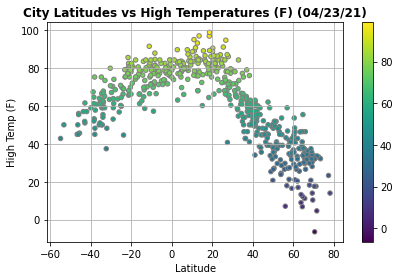

In [8]:
# Build scatter plot for Latitudes vs. Temperatures

# set x and y values, set value for colormap
# colormap reference https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
x = weather_df['Latitude']
y = weather_df['High Temp (F)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='viridis', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs High Temperatures (F) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('High Temp (F)')
plt.grid(True)
plt.colorbar()

# save to image file - saving as a .jpg so I don't have to deal with the whitespace issue (.png files will save with transparent bg)
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/Temp_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

This code is analyzing temperature against a city's latitude on a given day (Friday, April 23, 2021). The plot indicates that the closer a city is to the equator (0), the warmer its temperature.

## Latitude vs. Humidity Plot

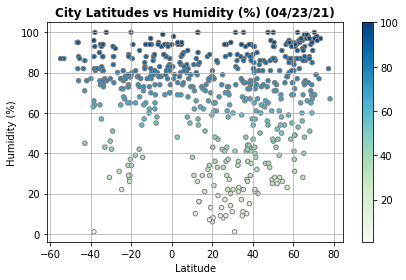

In [9]:
# Build scatter plot for Latitudes vs. Humidity

# set x and y values, set value for colormap
x = weather_df['Latitude']
y = weather_df['Humidity (%)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='GnBu', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs Humidity (%) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/Humid_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

This code is analyzing humidity levels against a city's latitude on a given day (Friday, April 23, 2021). While there is some clustering at 10-50 degrees latitude and 0-40% humidity, the plot does not indicate a strong correlation between a city's latitude and its humidity level (%).

## Latitude vs. Cloudiness Plot

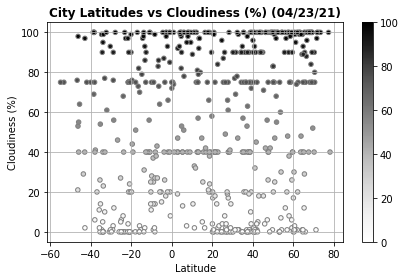

In [10]:
# Build scatter plot for Latitudes vs. Cloudiness

# set x and y values, set value for colormap
x = weather_df['Latitude']
y = weather_df['Cloudiness (%)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='Greys', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs Cloudiness (%) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/Cloud_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

This code is analyzing cloudiness against a city's latitude on a given day (Friday, April 23, 2021). The plot does not indicate a correlation between a city's latitude and its cloudiness.

## Latitude vs. Wind Speed Plot

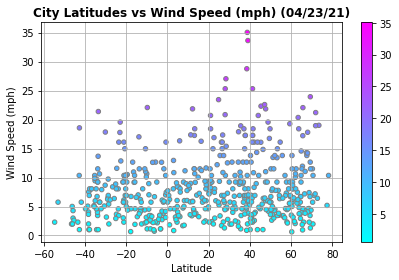

In [12]:
# Build scatter plot for Latitudes vs. Wind Speed

# set x and y values, set value for colormap
x = weather_df['Latitude']
y = weather_df['Wind (mph)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='cool', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs Wind Speed (mph) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/Wind_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

This code is analyzing wind speed (mph) against a city's latitude on a given day (Friday, April 23, 2021). While there is some small clustering at 20-40 degrees latitude and 25-35 mph wind speed, the plot does not indicate a strong correlation between a city's latitude and its wind speed.

## Linear Regression

In [52]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
northern_df = weather_df.loc[(weather_df['Latitude']>=0)]
southern_df = weather_df.loc[(weather_df['Latitude']<0)]

# --> NOTE: I attempted to build a function to run all regression plots (see code below) - while the plots would produce, they did not save as figures correctly, and I could not figure out how to plot the chart title, so I went back to coding the Linear Regression plots individually.

# def regress_plots(x_values, y_values, data_point, label_loc):
    
#     # add regression line and equation to plot
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#     # define the plot
#     plt.scatter(x_values, y_values)
#     plt.plot(x_values, regress_values, 'r-')
#     plt.annotate(line_eq, label_loc, fontsize=15, color='red')
#     plt.xlabel('Latitude')
#     plt.ylabel(data_point)
#     print(f'The r-value is: {rvalue**2}')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# EXAMPLE PLOT WITH ABOVE FUNCTION

# x_values = northern_df['Latitude']
# y_values = northern_df['High Temp (F)']
# regress_plots(x_values, y_values, 'High Temp (F)', (5,10))
# plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Temp_v_Lat.jpg')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.79.


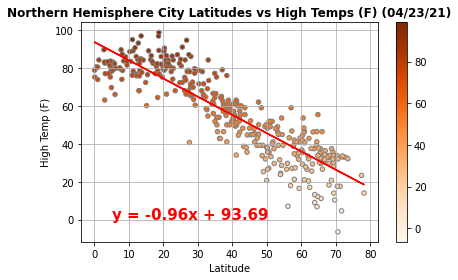

In [55]:
# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = northern_df['Latitude']
y_values = northern_df['High Temp (F)']
t = y_values

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Oranges', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (5,0), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Northern Hemisphere City Latitudes vs High Temps (F) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('High Temp (F)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Temp_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.56.


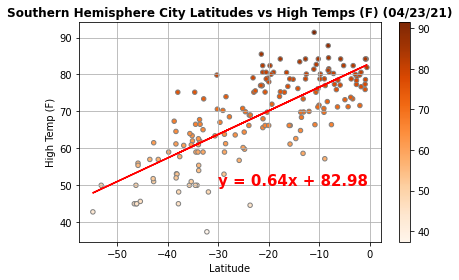

In [62]:
# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Build scatter plot for Southern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = southern_df['Latitude']
y_values = southern_df['High Temp (F)']
t = y_values

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Oranges', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (-30,50), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Southern Hemisphere City Latitudes vs High Temps (F) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('High Temp (F)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/South_Temp_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

The Northern and Southern Hemisphere plots above indicate a correlation between a city's latitude and its temperature. The Northern Hemisphere plot shows a negative correlation line; as the latitude increases (the further from the equator a city is), the temperature decreases. The Southern Hemisphere plot shows a positive correlation line; as the latitude increases (the closer to the equator a city is) the temperature increases. The Northern Hemisphere plot indicates a stronger correlation (demostrated by the r-value) between latitude and temperature than the Southern Hemisphere. Overall, the closer to the equator a city's latitude (on Friday, April 23, 2021), the warmer the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.03.


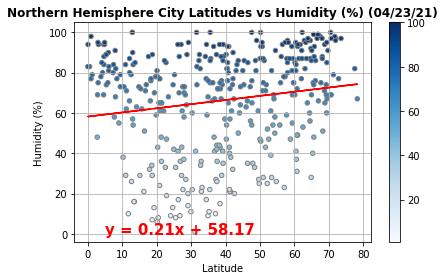

In [65]:
# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = northern_df['Latitude']
y_values = northern_df['Humidity (%)']
t = y_values

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Blues', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (5,0), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Northern Hemisphere City Latitudes vs Humidity (%) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Humid_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.0.


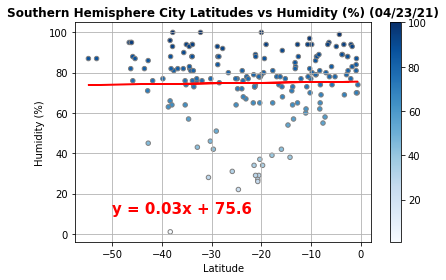

In [71]:
# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = southern_df['Latitude']
y_values = southern_df['Humidity (%)']
t = y_values

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Blues', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (-50,10), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Southern Hemisphere City Latitudes vs Humidity (%) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/South_Humid_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

The Northern and Southern Hemisphere plots above do not indicate a correlation between a city's latitude and its humidity. While there is a slight positive correlation on the Northern Hemisphere plot, the r-value indicates there is little to no linear relationship between the data points.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.01.


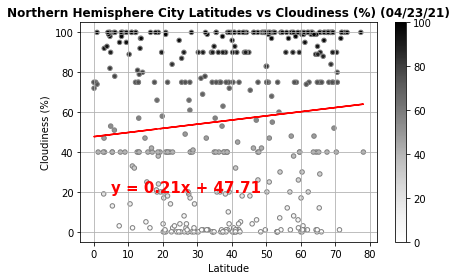

In [85]:
# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness (%)']
t = y_values

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Greys', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (5,20), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Northern Hemisphere City Latitudes vs Cloudiness (%) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Clouds_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0.


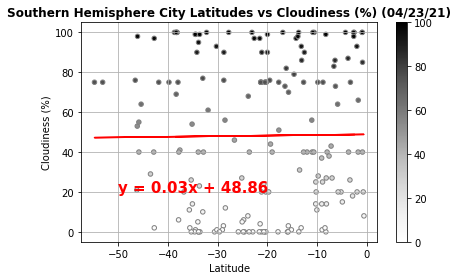

In [87]:
# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness (%)']
t = y_values

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Greys', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (-50,20), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Southern Hemisphere City Latitudes vs Cloudiness (%) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/South_Clouds_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

The Northern and Southern Hemisphere plots above do not indicate a correlation between a city's latitude and its cloudiness. While there is a slight positive correlation on the Northern Hemisphere plot, the r-value indicates there is little to no linear relationship between the data points.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0.


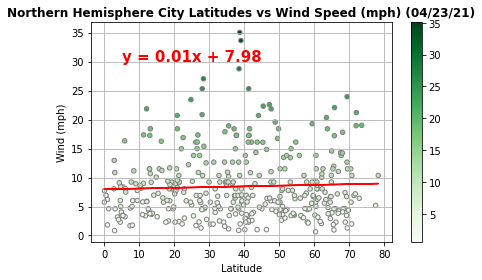

In [89]:
# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = northern_df['Latitude']
y_values = northern_df['Wind (mph)']
t = y_values

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Greens', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (5,30), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Northern Hemisphere City Latitudes vs Wind Speed (mph) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind (mph)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Wind_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0.


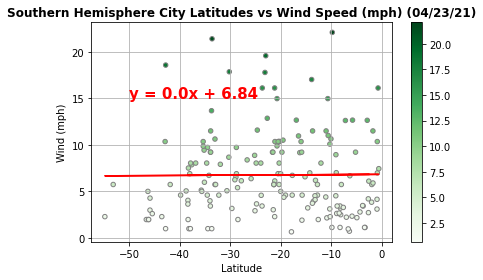

In [91]:
# add regression line and equation to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Build scatter plot for Northern Hemisphere - Temp v Latitude

# set x and y values, set value for colormap
x_values = southern_df['Latitude']
y_values = southern_df['Wind (mph)']
t = y_values

# chart the scatter plot
plt.scatter(x_values, y_values, c=t, marker='o', s=20, cmap='Greens', edgecolor='grey')
plt.plot(x_values, regress_values, '-', color='red')
plt.annotate(line_eq, (-50,15), fontsize=15, color='red', weight='bold')

# print the r-squared value
print(f'The r-squared value is: ' + str(round(rvalue**2,2)) + '.')

# print chart and axis titles
plt.title ('Southern Hemisphere City Latitudes vs Wind Speed (mph) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind (mph)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/South_Wind_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

### Analysis

The Northern and Southern Hemisphere plots above do not indicate a correlation between a city's latitude and its windiness. The r-values indicate there is no linear relationship between the data points on both plots